In [1]:
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Average
import tensorflow as tf
import os
import numpy as np

In [2]:
model_cnn1 = load_model(os.path.join('models','cnnB.h5'))

In [3]:
model_cnn1 = Model(inputs=model_cnn1.inputs,
                outputs=model_cnn1.outputs,
                name='name_of_model_cnn_1')

In [4]:
model_cnn2 = load_model(os.path.join('models','cnnB3.h5'))
model_cnn2 = Model(inputs=model_cnn2.inputs,
                outputs=model_cnn2.outputs,
                name='name_of_model_cnn_2')

In [5]:
model_svm1 = load_model(os.path.join('models','svmB.h5'))
model_svm1 = Model(inputs=model_svm1.inputs,
                outputs=model_svm1.outputs,
                name='name_of_model_svm_1')

In [6]:
model_svm2 = load_model(os.path.join('models','svmB3.h5'))
model_svm2 = Model(inputs=model_svm2.inputs,
                outputs=model_svm2.outputs,
                name='name_of_model_svm_2')

In [7]:
models = [model_cnn1, model_cnn2, model_svm1, model_svm2]
model_input = Input(shape=(40, 40, 3))
model_outputs = [model(model_input) for model in models]
ensemble_output = Average()(model_outputs)
ensemble_model = Model(inputs=model_input, outputs=ensemble_output, name='ensemble')

In [8]:
ensemble_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [10]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 30, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 30, class_mode = 'categorical')

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [11]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [15]:
logs = ensemble_model.fit(training_set, epochs = 10,
                         validation_data = test_set, validation_steps = 100, callbacks=[tf_callback])

Epoch 1/10
400/400 [==============================] - 221s 549ms/step - loss: 0.3025 - accuracy: 0.9385 - val_loss: 0.3196 - val_accuracy: 0.9410
Epoch 2/10
400/400 [==============================] - 220s 551ms/step - loss: 0.3012 - accuracy: 0.9344 - val_loss: 0.3372 - val_accuracy: 0.9403
Epoch 3/10
400/400 [==============================] - 218s 544ms/step - loss: 0.3049 - accuracy: 0.9352 - val_loss: 0.3247 - val_accuracy: 0.9387
Epoch 4/10
400/400 [==============================] - 224s 561ms/step - loss: 0.2898 - accuracy: 0.9393 - val_loss: 0.3416 - val_accuracy: 0.9337
Epoch 5/10
400/400 [==============================] - 229s 573ms/step - loss: 0.3136 - accuracy: 0.9355 - val_loss: 0.3462 - val_accuracy: 0.9353
Epoch 6/10
400/400 [==============================] - 222s 555ms/step - loss: 0.3061 - accuracy: 0.9385 - val_loss: 0.3295 - val_accuracy: 0.9383
Epoch 7/10
400/400 [==============================] - 225s 562ms/step - loss: 0.2939 - accuracy: 0.9414 - val_loss: 0.3294 -

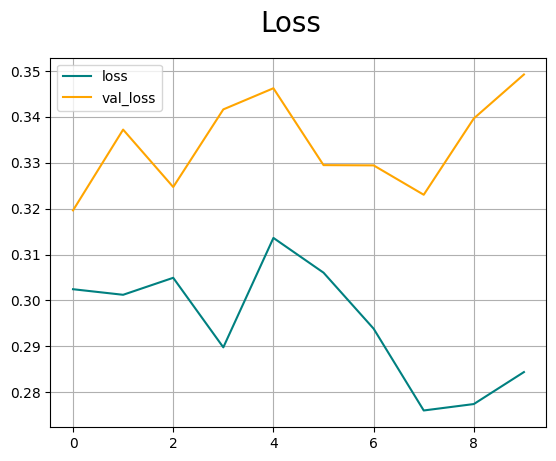

In [18]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(logs.history['loss'], color='teal', label='loss')
plt.plot(logs.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

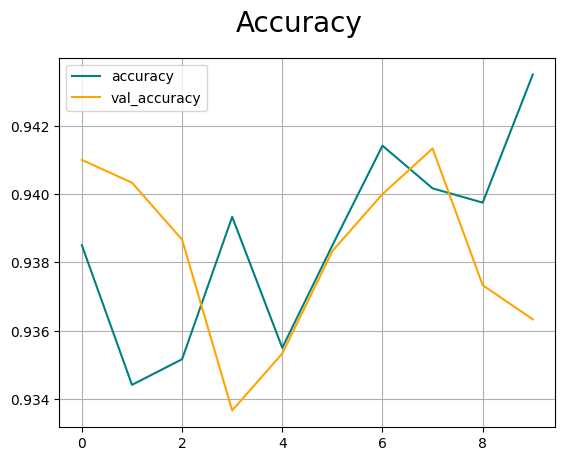

In [19]:
fig = plt.figure()
plt.plot(logs.history['accuracy'], color='teal', label='accuracy')
plt.plot(logs.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

In [20]:
from tensorflow.keras.models import load_model
import os

In [22]:
ensemble_model.save(os.path.join('models','Emodel1.h5'))

ValueError: Unable to create dataset (name already exists)

In [23]:
logs1 = ensemble_model.fit(training_set, epochs = 100,
                         validation_data = test_set, validation_steps = 100, callbacks=[tf_callback])

Epoch 1/100
400/400 [==============================] - 222s 555ms/step - loss: 0.2849 - accuracy: 0.9448 - val_loss: 0.3193 - val_accuracy: 0.9390
Epoch 2/100
400/400 [==============================] - 225s 562ms/step - loss: 0.2925 - accuracy: 0.9404 - val_loss: 0.3600 - val_accuracy: 0.9397
Epoch 3/100
400/400 [==============================] - 225s 562ms/step - loss: 0.2905 - accuracy: 0.9389 - val_loss: 0.3615 - val_accuracy: 0.9337
Epoch 4/100
400/400 [==============================] - 221s 552ms/step - loss: 0.2903 - accuracy: 0.9436 - val_loss: 0.3461 - val_accuracy: 0.9373
Epoch 5/100
400/400 [==============================] - 225s 563ms/step - loss: 0.2849 - accuracy: 0.9450 - val_loss: 0.3562 - val_accuracy: 0.9367
Epoch 6/100
400/400 [==============================] - 226s 565ms/step - loss: 0.2924 - accuracy: 0.9429 - val_loss: 0.3540 - val_accuracy: 0.9423
Epoch 7/100
400/400 [==============================] - 227s 567ms/step - loss: 0.2723 - accuracy: 0.9467 - val_loss: 0

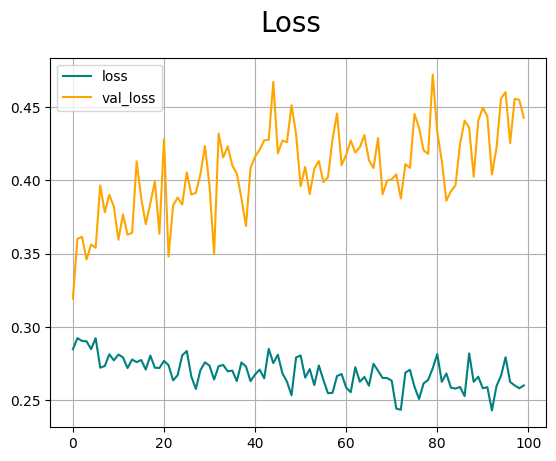

In [24]:
fig = plt.figure()
plt.plot(logs1.history['loss'], color='teal', label='loss')
plt.plot(logs1.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

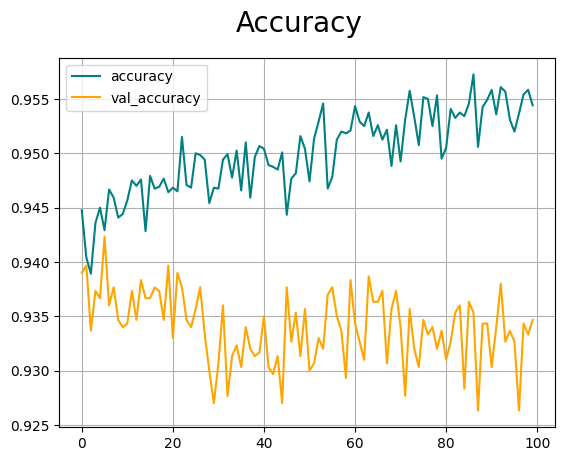

In [25]:
fig = plt.figure()
plt.plot(logs1.history['accuracy'], color='teal', label='accuracy')
plt.plot(logs1.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()